#**Grip At The Sparks Foundation Intenship**



---


#Prediction using Supervised Machine Learnin (Task-1)


---



#Intern:-Aviral Joshi

---



In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

***This is a simple linear regression task as it involves just two variables***. 

#**Importing Libraries**

---



In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [ ]:
#Reading the dataset
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
print("Dataset shape",df.shape)

Dataset shape (25, 2)


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

Getting average *score* and average studying *hours *.

---



In [ ]:
df_mean = df["Scores"].mean()
avg_hours = df['Hours'].mean()
print('Average Score:-',df_mean)
print('Average Studying Hours:-',avg_hours)

Average Score:- 51.48
Average Studying Hours:- 5.012


#Data Visualization

---



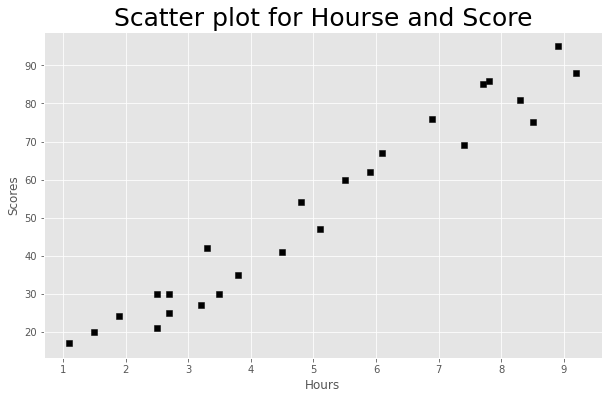

In [ ]:
%matplotlib inline
#Scatter plot 
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
plt.scatter(df.Hours,df.Scores,color='black',marker='s')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter plot for Hourse and Score',size=25)
plt.show()

### Both the variables are positively correlated

---



In [ ]:
df.corr()    #correlation between two values

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


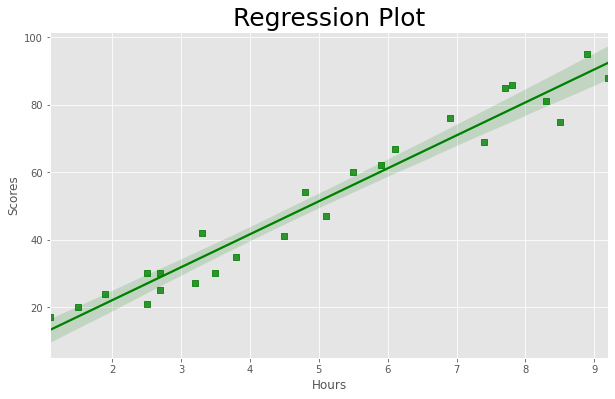

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Regression Plot",size=25)
sns.regplot(df.Hours,df.Scores,color='green',marker='s')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


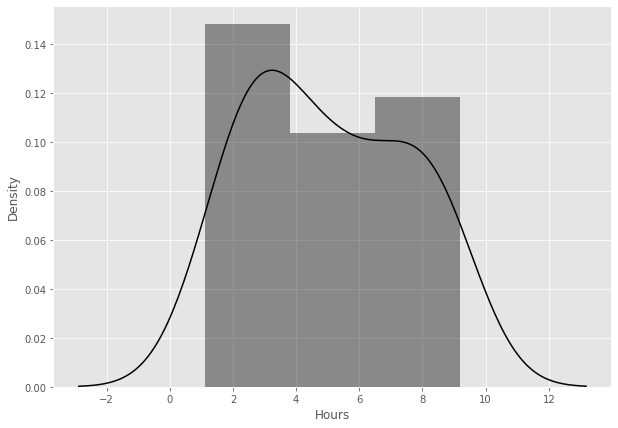

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df['Hours'],color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


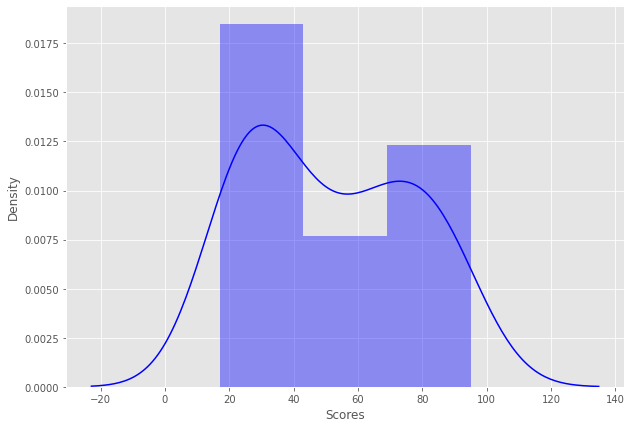

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df['Scores'],color='b')
plt.show()

In [ ]:
X= df.iloc[:, :-1].values  
y= df.iloc[:, 1].values

In [ ]:
print(X.shape)
print(y.shape)

(25, 1)
(25,)


#Train Test Splits

---



In [ ]:
#rain_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test  = train_test_split(X,y,test_size= 0.25,random_state= 0)

#Model Training with Simple Linear Regression

---



In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict(X_test)

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [ ]:
#Intercept and Coefficients
print('Intercept:-',model.intercept_)
print('Coefficients for the prediction:-',model.coef_)

Intercept:- 1.9322042531516601
Coefficients for the prediction:- [9.94167834]


In [ ]:
#Estimating training and test score
print("Training Score:",model.score(X_train,y_train))
print("Test Score:",model.score(X_test,y_test))

Training Score: 0.9484509249326872
Test Score: 0.9367661043365056


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
# My new df for comparing the actual points and predicted points
New_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
New_df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#Plotting the regression line by using linear Regression formula y=m*x + c

---



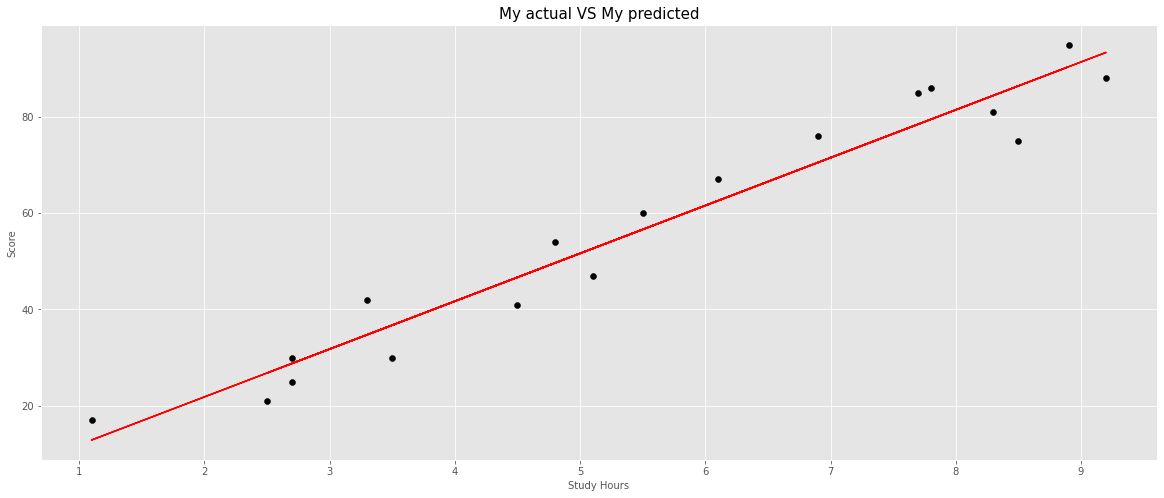

In [ ]:
line = model.coef_*X_train+model.intercept_
fig=plt.figure(figsize=(20,8))
plt.scatter(X_train,y_train,color='black')
plt.plot(X_train,line,color='Red')
plt.xlabel('Study Hours',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.title('My actual VS My predicted',size=15)
plt.show()

#Evaluating the model

---


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

---



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean Squared Error(RMSE):-',mean_squared_error(y_test,y_pred,squared=False))
print('Mean absolute Error:-',mean_absolute_error(y_test,y_pred))

Mean Squared Error(RMSE):- 4.509204328368805
Mean absolute Error:- 4.130879918502482


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


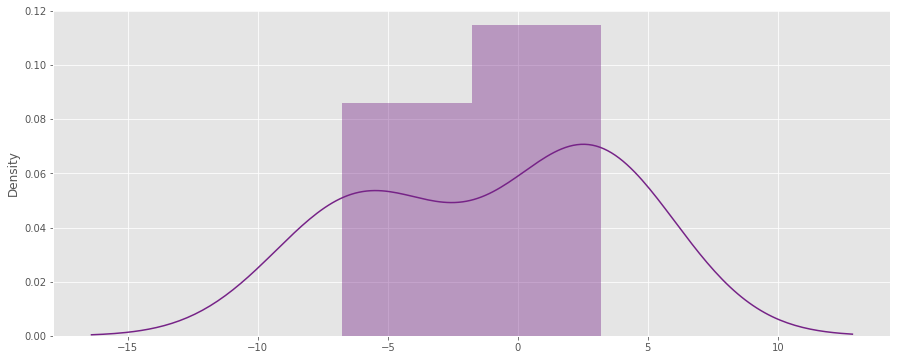

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(y_test-y_pred,color='#762387')

#**Final Prediction**:-

---



In [ ]:
study_hr = float(input('Enter the Total Number of Study Hrs:- '))
prediction=model.predict([[study_hr]])
print('After {} Hours of studies student might can score {}'.format(study_hr,prediction))

Enter the Total Number of Study Hrs:- 9.25
After 9.25 Hours of studies student might can score [93.89272889]


#Predicted Score:- 93.892


---



##Conclusion : Successfully predicted the percentage of an student based on the no. of study hours.##

#Thanks :)